In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/data_YesBank_StockPrices.csv")
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


Mean Squared Error: 190.69579351270283
Mean Absolute Error: 8.725305405405393
R-squared Score: 0.9789026096874854
Predicted Close Price: 14.4389


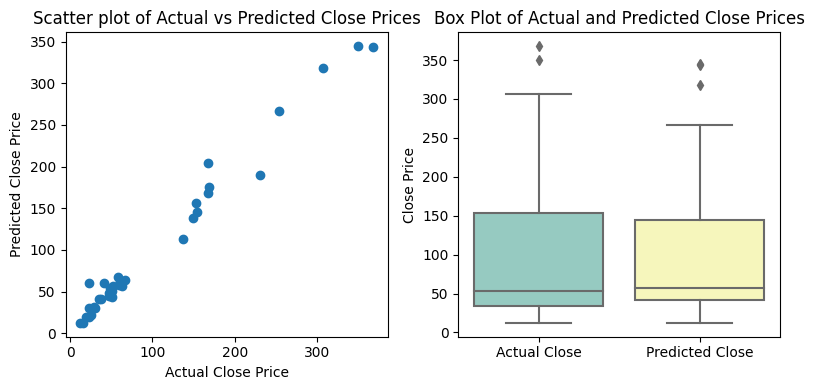

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Extract features and target
X = data[["Open", "High", "Low"]]
y = data["Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Predict the Close price for a new data point
new_data = pd.DataFrame({
    "Open": [12.41],
    "High": [14.9],
    "Low": [12.21]
})

predicted_close = regressor.predict(new_data)
print(f"Predicted Close Price: {predicted_close[0]}")

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Scatter plot of Actual vs Predicted Close Prices")

# Box plot of predicted and actual values
plt.subplot(1, 2, 2)
sns.boxplot(data=[y_test, y_pred], palette="Set3")
plt.xticks([0, 1], ["Actual Close", "Predicted Close"])
plt.ylabel("Close Price")
plt.title("Box Plot of Actual and Predicted Close Prices")

plt.tight_layout()
plt.show()

